
# Real-time Election Results: Portugal 2019 Data Set

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('Election.csv')
data

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


Dataset Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level
    

In [3]:
#dataset columns

data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [4]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [5]:
#data types of the data

data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [6]:
#finding null values

data.isnull().any()

TimeElapsed                 False
time                        False
territoryName               False
totalMandates               False
availableMandates           False
numParishes                 False
numParishesApproved         False
blankVotes                  False
blankVotesPercentage        False
nullVotes                   False
nullVotesPercentage         False
votersPercentage            False
subscribedVoters            False
totalVoters                 False
pre.blankVotes              False
pre.blankVotesPercentage    False
pre.nullVotes               False
pre.nullVotesPercentage     False
pre.votersPercentage        False
pre.subscribedVoters        False
pre.totalVoters             False
Party                       False
Mandates                    False
Percentage                  False
validVotesPercentage        False
Votes                       False
Hondt                       False
FinalMandates               False
dtype: bool

In [7]:
#finging unique values in the columns

data.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

# Data Visualization

Univariate Plot

Território Nacional    1134
Leiria                 1134
Porto                  1134
Braga                  1134
Coimbra                1080
Viana do Castelo       1080
Viseu                  1080
Madeira                1080
Lisboa                 1080
Setúbal                1080
Aveiro                 1080
Évora                  1026
Santarém               1026
Guarda                 1026
Faro                   1026
Castelo Branco          972
Bragança                972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64


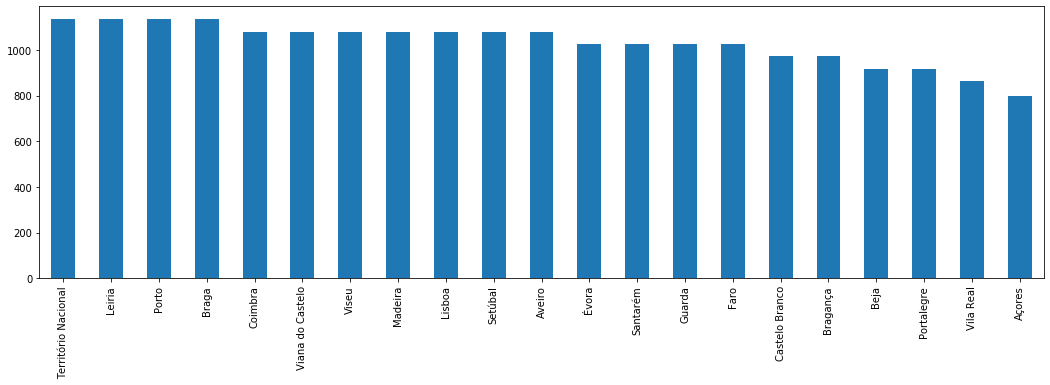

In [8]:
plt.figure(figsize=(18,5))
print(data['territoryName'].value_counts())
data['territoryName'].value_counts().plot.bar()


0      5055
3      2949
2      1755
9      1726
6      1419
       ... 
22       21
197      21
149      21
37       21
17       20
Name: totalMandates, Length: 62, dtype: int64


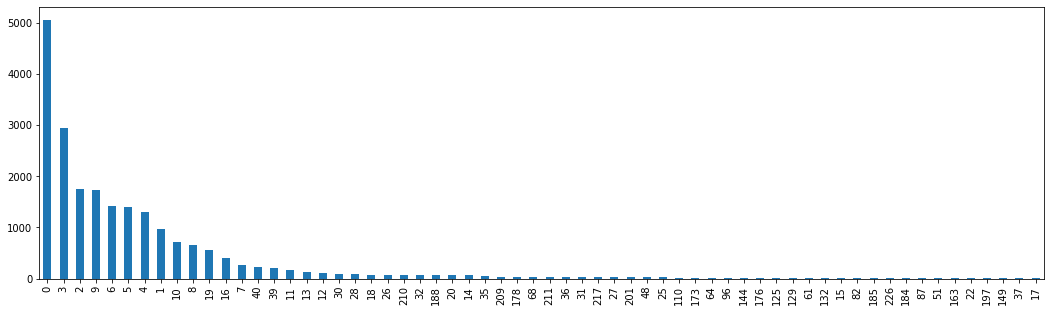

In [9]:
plt.figure(figsize=(18,5))
print(data['totalMandates'].value_counts())
data['totalMandates'].value_counts().plot.bar()

PNR          1127
CDS-PP       1127
IL           1127
PCP-PEV      1127
PPD/PSD      1127
PDR          1127
PS           1127
PCTP/MRPP    1127
A            1127
PAN          1127
L            1127
B.E.         1127
CH           1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64


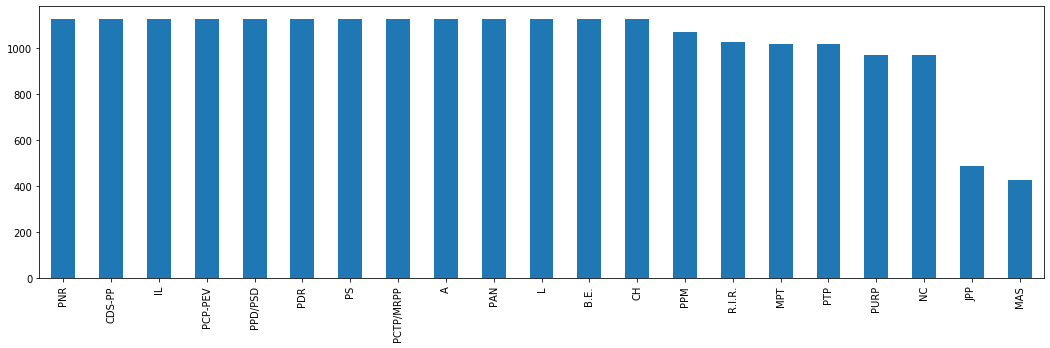

In [10]:
plt.figure(figsize=(18,5))
print(data['Party'].value_counts())
data['Party'].value_counts().plot.bar()

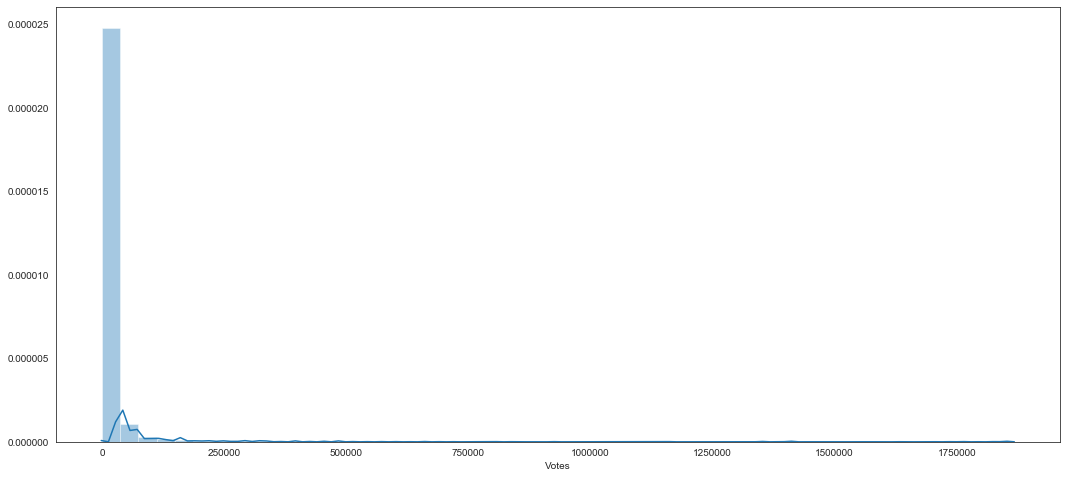

In [11]:
plt.figure(figsize=(18,8))
sb.set_style('white')
sb.distplot(data['Votes'])

0      17823
1       1134
2        695
3        641
4        378
5        270
8        108
12       108
7         54
6         54
77        54
20        54
19        54
9         54
106       54
17        54
15        54
Name: FinalMandates, dtype: int64


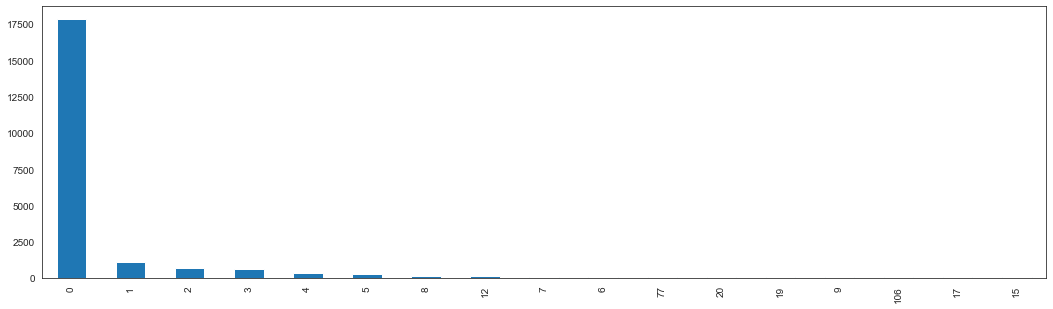

In [12]:
plt.figure(figsize=(18,5))
print(data['FinalMandates'].value_counts())
data['FinalMandates'].value_counts().plot.bar()

Bivariate Plot

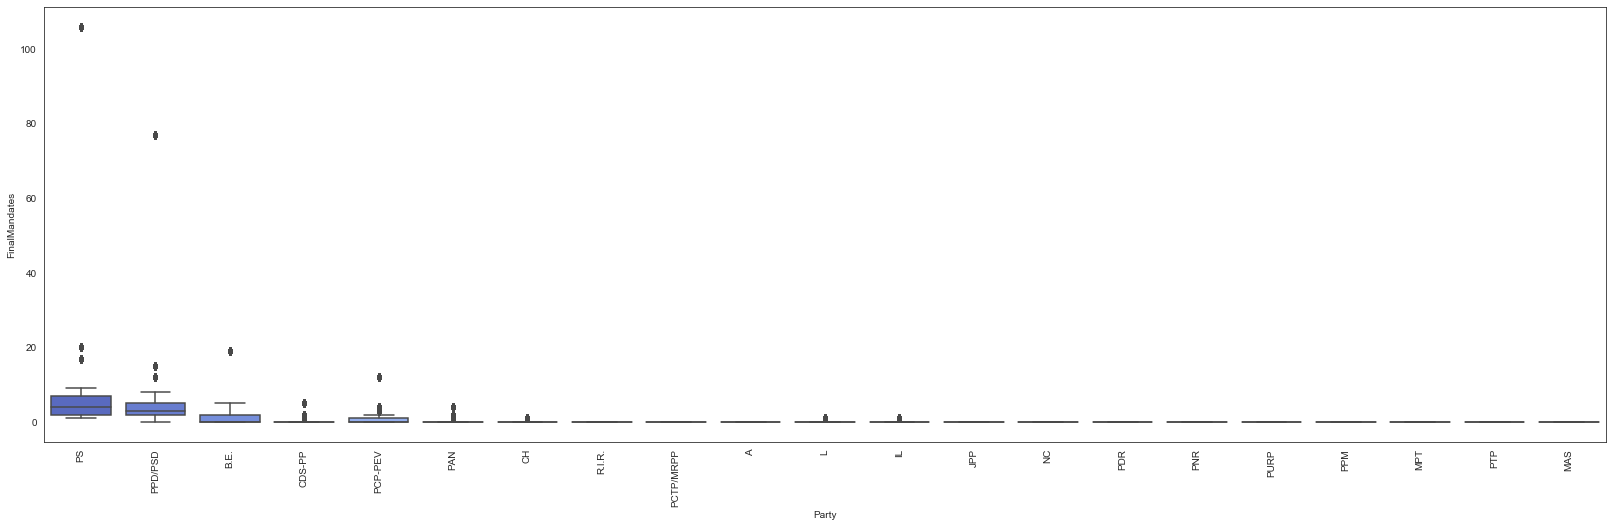

In [13]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.boxplot(x='Party',y='FinalMandates',data=data, palette='coolwarm')

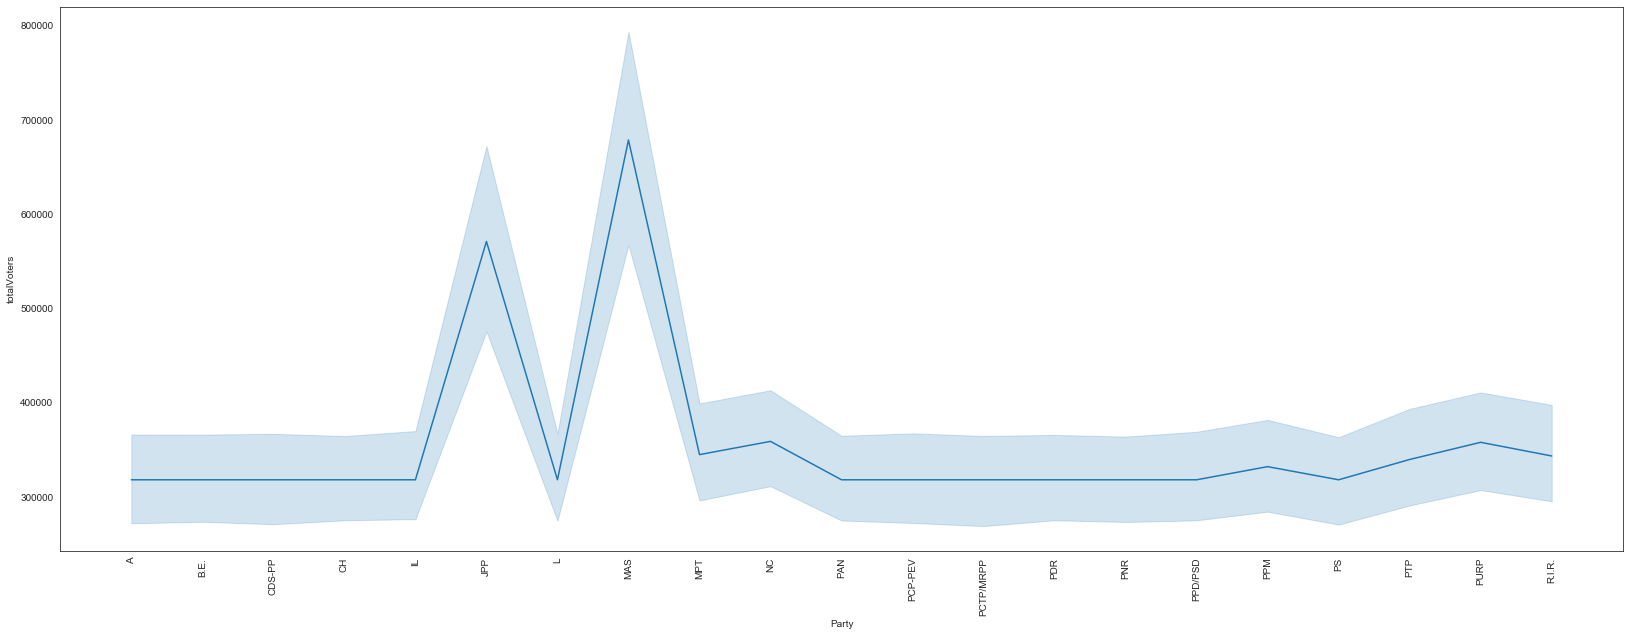

In [14]:
plt.figure(figsize=(28,10))
plt.xticks(rotation=90)
sb.lineplot(x='Party',y='totalVoters',data=data)

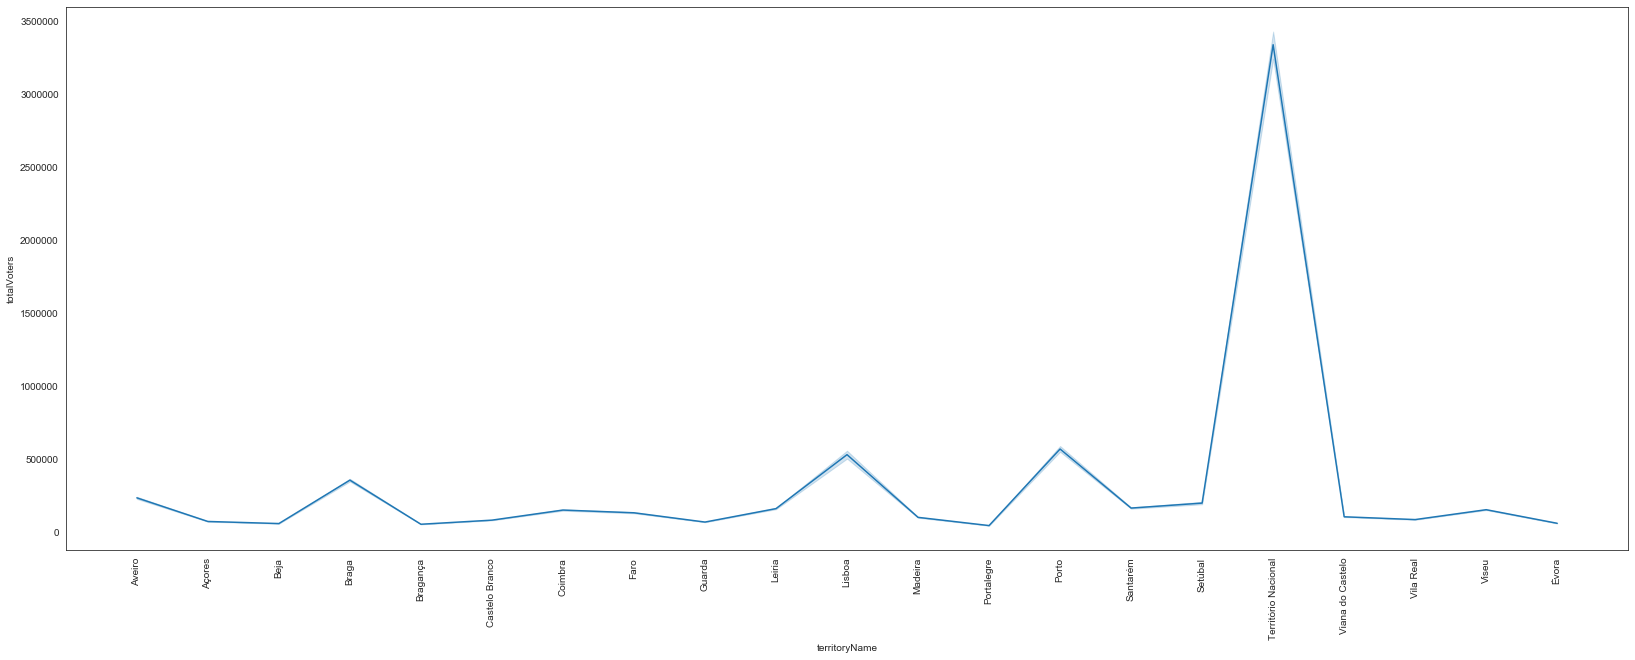

In [15]:
plt.figure(figsize=(28,10))
plt.xticks(rotation=90)
sb.lineplot(x='territoryName',y='totalVoters',data=data)

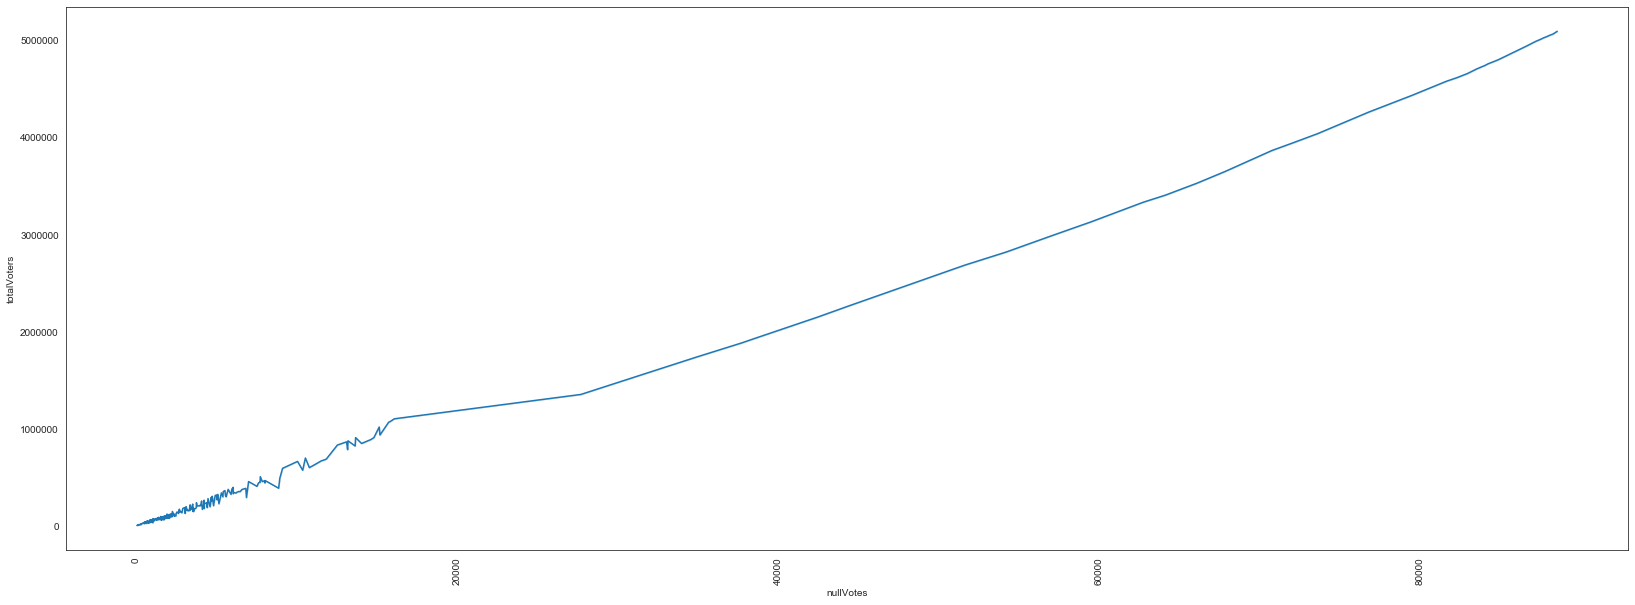

In [16]:
plt.figure(figsize=(28,10))
plt.xticks(rotation=90)
sb.lineplot(x='nullVotes',y='totalVoters',data=data)

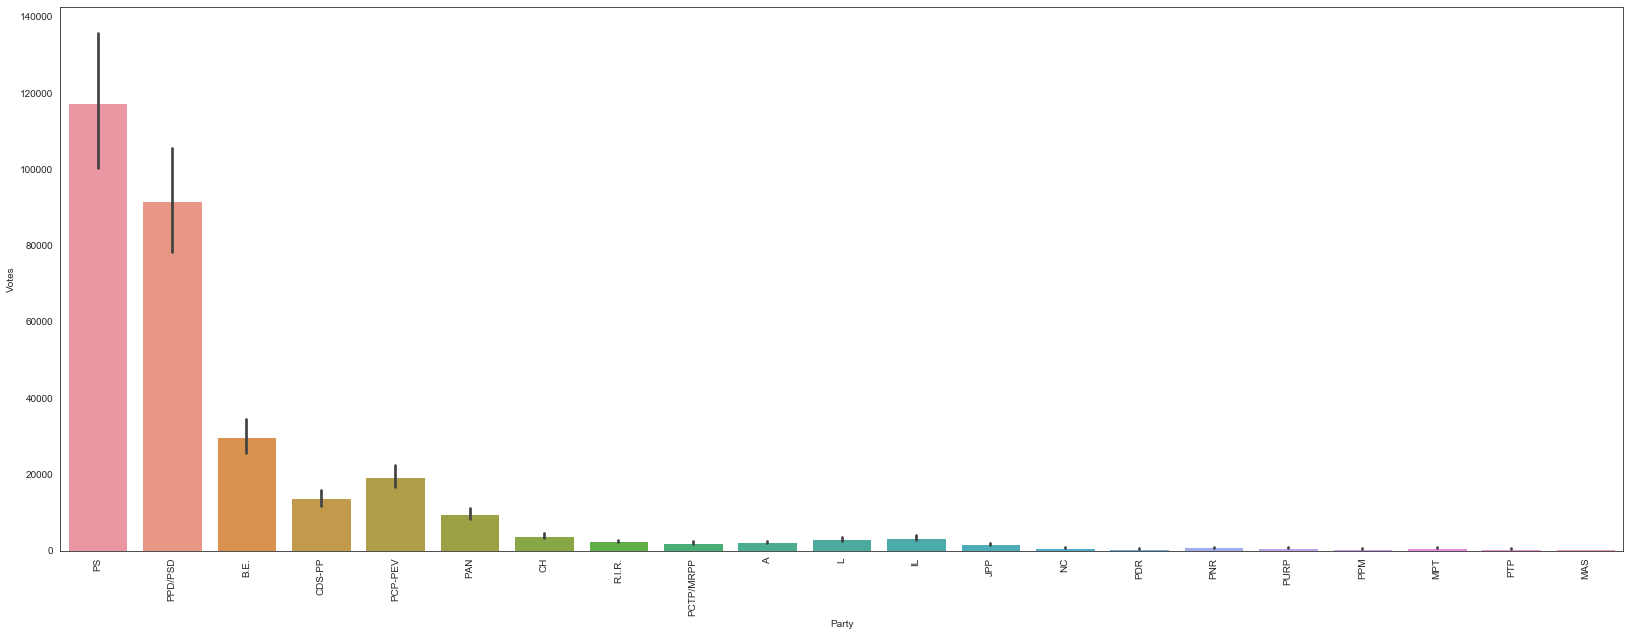

In [17]:
plt.figure(figsize=(28,10))
plt.xticks(rotation=90)
sb.barplot(x='Party',y='Votes',data=data)

In [18]:
#To get the descriptive analysis 

data.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


# Data Preprocessing 

In [19]:
data.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [20]:
col = [ 'territoryName','Party']

#label encoding

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,18,0,0.13,0.14,239,0,0


In [21]:
#droping of columns which doesn't support in modeling 

datafin=data.drop(['TimeElapsed', 'time','blankVotesPercentage','nullVotesPercentage',
       'votersPercentage','pre.blankVotesPercentage','pre.nullVotesPercentage',
       'pre.votersPercentage','validVotesPercentage', ],axis=1)

In [22]:
datafin

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,Votes,Hondt,FinalMandates
0,16,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,38.29,147993,94,106
1,16,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,33.28,128624,81,77
2,16,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,6.81,26307,16,19
3,16,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,4.90,18923,12,5
4,16,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,4.59,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,19,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,0.19,332,0,0
21639,19,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,0.18,326,0,0
21640,19,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,0.14,256,0,0
21641,19,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,0.13,239,0,0


In [23]:
#dropping null values from the dataset

datafin.corr()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,Votes,Hondt,FinalMandates
territoryName,1.000000,0.172374,0.181563,0.223300,0.215599,0.178082,0.196554,0.195483,0.193847,0.182412,0.200393,0.196979,0.195102,0.012263,0.057823,-0.003433,0.078520,0.084131,0.077042
totalMandates,0.172374,1.000000,0.217404,0.765877,0.873415,0.969988,0.967294,0.974407,0.976336,0.973357,0.969992,0.972976,0.975404,-0.003111,0.336989,-0.010171,0.395617,0.288420,0.264117
availableMandates,0.181563,0.217404,1.000000,0.745472,0.562719,0.390638,0.407366,0.385828,0.379093,0.383877,0.399074,0.391272,0.383089,-0.001882,0.072320,-0.011083,0.152348,0.291310,0.266764
numParishes,0.223300,0.765877,0.745472,1.000000,0.954092,0.861279,0.870240,0.856855,0.850881,0.856779,0.864837,0.860782,0.853779,-0.004013,0.257365,-0.010770,0.343593,0.359283,0.329009
numParishesApproved,0.215599,0.873415,0.562719,0.954092,1.000000,0.951265,0.956142,0.946191,0.940941,0.947190,0.951899,0.949110,0.943147,-0.003765,0.293795,-0.009840,0.380311,0.340901,0.312177
blankVotes,0.178082,0.969988,0.390638,0.861279,0.951265,1.000000,0.998781,0.998297,0.997951,0.999657,0.997490,0.998487,0.998178,-0.003826,0.326630,-0.011883,0.404003,0.322780,0.295583
nullVotes,0.196554,0.967294,0.407366,0.870240,0.956142,0.998781,1.000000,0.998988,0.998405,0.998883,0.999298,0.999296,0.998706,-0.003172,0.325711,-0.011602,0.404195,0.326144,0.298663
subscribedVoters,0.195483,0.974407,0.385828,0.856855,0.946191,0.998297,0.998988,1.000000,0.999695,0.999145,0.999323,0.999954,0.999841,-0.003240,0.328197,-0.011276,0.404861,0.322750,0.295555
totalVoters,0.193847,0.976336,0.379093,0.850881,0.940941,0.997951,0.998405,0.999695,1.000000,0.998888,0.998554,0.999515,0.999952,-0.003079,0.328836,-0.011560,0.404996,0.321587,0.294490
pre.blankVotes,0.182412,0.973357,0.383877,0.856779,0.947190,0.999657,0.998883,0.999145,0.998888,1.000000,0.998383,0.999203,0.999085,-0.003586,0.327807,-0.011719,0.404458,0.321997,0.294866


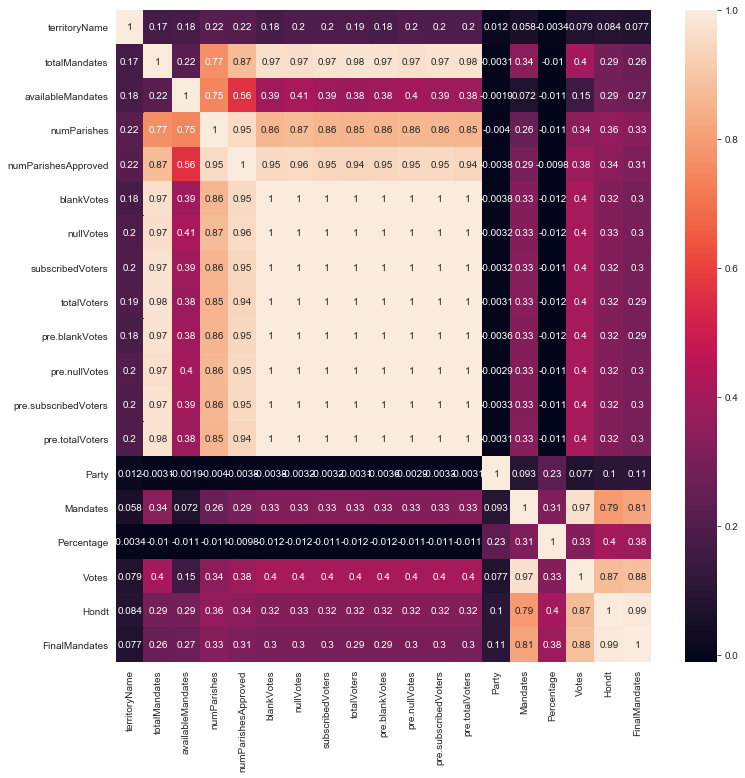

In [24]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,12))
sb.heatmap(datafin.corr(),annot=True)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [25]:
x=datafin.drop(['FinalMandates'],axis=1)
y=datafin['FinalMandates']

In [26]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=300)

In [28]:
model=[LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]

# Finding metric data , cross validation and prediction


Using for loop to find n number of model buidling at once

In this we are  finding Accuracy score  Confusion Matrix   Classification Matrix  

Also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [29]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print ('Accuracy score:',accuracy_score(y_test,pred.round())*100)
    print ('Confusion Matrix:',confusion_matrix(y_test,pred.round()))
    print ('Classification Matrix:',classification_report(y_test,pred.round()))
    print('-'*100)
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score:',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)


Accuracy score: 93.23169323169324
Confusion Matrix: [[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   9   60 3507 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    3    3    0]]
Classification Matrix:               precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.99      0.98      0.98      3593
         1.0       0.80      0.81      0.80       219
         2.0       0.85      0.78      0.81       138
         3.0       0.94      0.85      0.89       142
         4.0       0.74      0.83      0.78        59
         5.0       0.94      0.54      0.68        54
         6.0       0.25      0.50      0.33         8
         7.0       0.69      0.82      0.75        11
         8.0       0.83      0.71      0.77        21
         9.0       0.53      1.00      0.69     

cross prediction [67.3334758  58.04576283 11.52548753 ...  0.08517146  0.08517146
  0.08517146]

****************************************************************************************************
Accuracy score: 99.9075999075999
Confusion Matrix: [[3593    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   1  218    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0  136    2    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    1  141    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0   59    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0   54    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    8    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0   11    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0

mean score : 0.9718539653391677
STD score: 0.055500301771767374

cross prediction [ 6.06285667e+01  4.65568474e+01  1.25629353e+01 ... -2.50925591e-03
 -2.50925591e-03 -2.50925591e-03]

****************************************************************************************************


# GridSearchCV

In [30]:
#gridsearch for DecisionTreeRegressor

param_grid = {'max_depth': [3, 5, 10],
     'max_features': [3, 4, 5]
    }
dtr = DecisionTreeRegressor()
gridscv = GridSearchCV(estimator=dtr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'max_features': [3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

# Saving the model with joblib

In [31]:
# Save the best model with the help of joblib and pickle

joblib.dump(dtr,'election.pkl')

['election.pkl']

# conclusion


Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib